# Face-Mask-Classification Project


Authors:
+ Tobias Palmowski
+ Fabian Metz
+ Thilo Sander

Date of Midterm-Report: 29.03.2021 <br>
Date of final submission: 26.04.2021


### Introduction

This Jupyter Notebook is the core of the Face-Mask-Classification Project performed in the class "Machine Learning" of the Hertie School in Berlin. There is one other Jupyter Notebook which deals with combining the different datasets into one large data set - a task only performed once and therefore outsourced to another file.


### Data Processing: Pipeline-Building

<br>
<br>
<br>
<br>
[Short Description]

In [111]:
# Import necessary libraries and set-up Jupyter NoteMasked-Face-Net-Datasetbook.

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import timeit

# Imports for dealing with images:
import PIL #Pillow (install with "pip install Pillow")

# to make this notebook's output stable across runs (safety measure)
np.random.seed(42)

# Set path to correct and incorrect data sets for keeping references short later
ROOT_DATA = "01_data"
PATH_DATA_CORRECT = os.path.join(ROOT_DATA + "/00_raw/Masked-Face-Net-Dataset/CMFD")
PATH_DATA_INCORRECT = os.path.join(ROOT_DATA + "/00_raw/Masked-Face-Net-Dataset/IMFD")

# Where to save possible figures
PROJECT_ROOT_DIR = "02_figures"
CHAPTER_ID = "02_baseline"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [81]:
# Open pickle file that contains the directory
import pickle
pic_data = pickle.load(open(os.path.join(ROOT_DATA + "/01_cleaned/pic_data_full.pkl"),"rb"))

In [82]:
# Copying dictionary data into separate data frames
rgb_data, labels = pic_data["rgb_data"], pic_data["labels"]

In [83]:
# Explore dimensionalities of data frames
print("Dimensions of rgb_data:", rgb_data.shape)
print("Dimensions of labels:", labels.shape)

Dimensions of rgb_data: (133582, 3072)
Dimensions of labels: (133582,)


In [84]:
# Split into test and training data set
from sklearn.model_selection import train_test_split

rgb_data_train, rgb_data_test, labels_train, labels_test = train_test_split(rgb_data, labels, test_size=0.10, random_state=42)

<div class="alert alert-block alert-danger">
<b>ATTENTION</b>
<p>
Adapt test size according to the size of the whole data set. 
</div>

### Baseline: SGD Classifier

<br>

This section defines a Stochastic Gradient Decent method as a baseline for the project.
[Short Description]

In [85]:
# redefining labels as True False
labels_train_tf = (labels_train == 1)
labels_test_tf = (labels_test == 1)

#Start timer
start_time = timeit.default_timer()

# Code for Baseline
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42) 
sgd_clf.fit(rgb_data_train, labels_train_tf)

#End timer
elapsed = timeit.default_timer() - start_time
print("Run-time of this cell in seconds: ", round(elapsed,2))

Run-time of this cell in seconds:  39.85


Parameters need to be checked, what makes sense for a toy dataset?

### Evaluation of Baseline

<br>
The normal Evaluation does not work with the current toy dataset as its too small.

<div class="alert alert-block alert-danger">
<b>ATTENTION</b>
<p>
The Evaluation Part is coded well, but does not work with the small test toy dataset.
</div>

In [86]:
#Start timer
start_time = timeit.default_timer()


# Cross Valuation Score
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(sgd_clf, rgb_data_train, labels_train_tf, cv=3, scoring="accuracy")

#End timer
elapsed = timeit.default_timer() - start_time
print("Run-time of this cell in seconds: ", round(elapsed,2))

Run-time of this cell in seconds:  88.41


<div class="alert alert-block alert-danger">
<b>Place to work on</b>
<p>
CV needs to be specified for whole dataset.
</div>

In [87]:
#Start timer
start_time = timeit.default_timer()

#create prediction sets
from sklearn.model_selection import cross_val_predict
labels_train_pred = cross_val_predict(sgd_clf, rgb_data_train, labels_train_tf, cv = 3)


#End timer
elapsed = timeit.default_timer() - start_time
print("Run-time of creating prediction sets: ", round(elapsed,2))


#Start timer
start_time = timeit.default_timer()


#Calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels_train_tf, labels_train_pred)


#End timer
elapsed = timeit.default_timer() - start_time
print("Run-time of calculation confusion matrix: ", round(elapsed,2))

Run-time of creating prediction sets:  84.48
Run-time of calculation confusion matrix:  0.06


<div class="alert alert-block alert-danger">
<b>Place to work on</b>
<p>
CV needs to be specified for whole dataset.
</div>

In [88]:
#Start timer
start_time = timeit.default_timer()


# precision and recall
from sklearn.metrics import precision_score, recall_score
ps = precision_score(labels_train_tf, labels_train_pred)
rs = recall_score(labels_train_tf, labels_train_pred)


#End timer
elapsed = timeit.default_timer() - start_time
print("Run-time of this cell in seconds: ", round(elapsed,2))

Run-time of this cell in seconds:  0.07


### Preliminary Output for Working Process
<br>
This section gives us the output for the confusion matrix, the cross validation score and the precision and recall stores for the current code and tuning.

In [89]:
# Output for us while working on it
print("Confusion Matrix")
pd.DataFrame(cm)

Confusion Matrix


,0,1
0,59763,236
1,172,60052


In [90]:
print('Cross Validation Scores')
print(cvs)

Cross Validation Scores
[0.99665627 0.99608225 0.9970804 ]


In [91]:
print("Precision Score")
print(ps)

Precision Score
0.9960854564755839


In [92]:
print("Recall Score")
print(rs)

Recall Score
0.997143995749203


<div class="alert alert-block alert-danger">
<b>Place to work on</b>
<p>
What output do we want to generate?
</div>

### Evaluating multiple untuned classifiers
<br>
In this section we define an array of initial classifiers and train them on our test data

In [93]:
#import classifiers 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier

#define classifiers
classifier_RandomForest = RandomForestClassifier(random_state=42)
classifier_LinSVC = svm.LinearSVC(max_iter=4000, tol=1e-3, random_state=42) #linear as normal (c based) is impractical using large datasets
classifier_DecTree = tree.DecisionTreeClassifier(random_state=42)
classifier_SGD = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
classifier_LogReg = LogisticRegression(max_iter=2000, tol=1e-3,random_state=42)
classifiers= [classifier_RandomForest,classifier_LinSVC,classifier_DecTree,classifier_SGD,classifier_LogReg]

<div class="alert alert-block alert-danger">
<b>ATTENTION</b>
<p>
Clarify role of max_iterations and possible connectd tradeoffs. Current code specified to produce no errors regarding max_iter
<br>
Clarify wether seed needs to be set individually?
</div>

In [94]:
# Start total timer
total_start_time = timeit.default_timer()

#intialize arrays and dictionaries 
running = 1
evaluation_scores = {} # dictionary
confusion_matrices = [] 



#training and evaluating classifiers
for classifier_x in classifiers:
    #Start timer
    loop_start_time = timeit.default_timer()
    
    #Train model
    classifier_x.fit(rgb_data_train, labels_train_tf) # train
    pred=cross_val_predict(classifier_x, rgb_data_train, labels_train_tf, cv = 3) # cross value prediction with 3 folds
    
    # store evaluation metrics 
    ps = precision_score(labels_train_tf, pred).round(3) 
    rs = recall_score(labels_train_tf, pred).round(3)
    cm = confusion_matrix(labels_train_tf, pred)
    cvs = cross_val_score(classifier_x, rgb_data_train, labels_train_tf, cv=3, scoring="accuracy").round(3)
    classifier_name = str(classifier_x) # set classifier names
    classifier_name = classifier_name[:classifier_name.find("(")] 
    
    #store evaluation scores in global dicitonary 
    evaluation_scores[classifier_name]= [ps,rs,cvs]
    
    #store confusion matricies in vector
    confusion_matrices.append(cm)
    running=running+1
    
    #Print Status
    #End timer
    loop_elapsed = timeit.default_timer() - loop_start_time
    print(">... ", round(loop_elapsed, 1) ," seconds run time: ", classifier_name)


#End timer
total_elapsed = timeit.default_timer() - total_start_time
print("Classifiers all finished. Run-time: ", round(total_elapsed,2))

>...  2030.4  seconds run time:  RandomForestClassifier


/home/thilosander/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/thilosander/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/thilosander/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/thilosander/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/thilosander/miniconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWa

>...  576.1  seconds run time:  LinearSVC
>...  2408.5  seconds run time:  DecisionTreeClassifier
>...  213.1  seconds run time:  SGDClassifier


AttributeError: 'str' object has no attribute 'decode'

<div class="alert alert-block alert-warning">
<b>ATTENTION</b>
<p>
    
+ Variable running is not necessary or?
+ Let's rewrite this as a function that does the same --> Easier to rerun the stuff later with only the classifiers we want or if you want to rerun a classifier.    
</div>

In [144]:
# creating and printing a table with the  evaluation scores
index = ["precision score", "recall score", "cross validation scores"]
table_1 = pd.DataFrame(evaluation_scores, index)
table_1

,RandomForestClassifier,LinearSVC,DecisionTreeClassifier,SGDClassifier
precision score,0.997,0.995,0.993,0.996
recall score,0.998,0.996,0.994,0.997
cross validation scores,"[0.998, 0.997, 0.998]","[0.996, 0.995, 0.995]","[0.994, 0.993, 0.993]","[0.997, 0.996, 0.997]"


<div class="alert alert-block alert-danger">
<b>ATTENTION</b>
<p>
Table export needs to be coded
</div>

<div class="alert alert-block alert-warning">
<b>ATTENTION</b>
<p>
Below: Hard-coded range is always a very bad idea.
</div>

Saving figure RandomForestClassifier
Saving figure LinearSVC
Saving figure DecisionTreeClassifier
Saving figure SGDClassifier


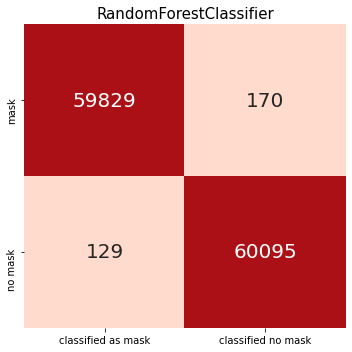

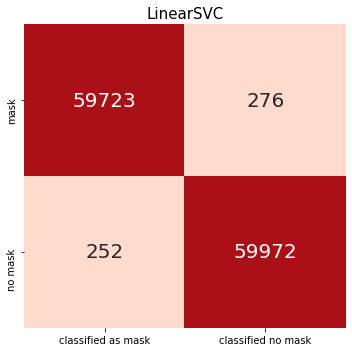

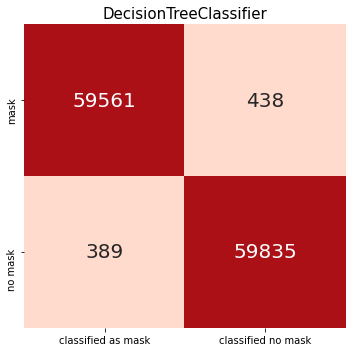

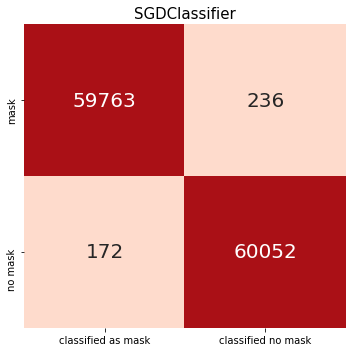

In [123]:
# creating confusion matrices with seaborn heatmaps 
for i in range(len(evaluation_scores)):
    classifier_name = str(classifiers[i]) # set classifier names
    classifier_name = classifier_name[:classifier_name.find("(")] 
    matrix = pd.DataFrame(confusion_matrices[i], columns = ["classified as mask", "classified no mask"],
                                    index = ["mask", "no mask"])
    
    # Actual plot
    plt.figure(figsize = (5,5))
    colormap = sns.color_palette("Reds")
    ax = plt.axes()
    sns.heatmap(matrix, ax = ax, annot = True, fmt='d', annot_kws={"size": 20}, cmap=colormap, cbar=False)
    ax.set_title(classifier_name, fontsize= 15)
    save_fig("{}".format(classifier_name))


<div class="alert alert-block alert-danger">
<b>ATTENTION</b>
<p>
Figures need to be improved regarding:
    - fontsize
    - figure label
    - positioning axis labels
    - colour?
    
Figure export needs to be coded.
</div>